Ex. 1.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np


def k_nearest_neigbours(X_train, X_t, y_train, k):
    neighbours = []
    dist = []
    for i in range(len(X_train)):
        dist.append((X_train[i], y_train[i], distance.euclidean(X_t, X_train[i])))
    
    dist.sort(key=lambda euc: euc[2]) #sortowanie po dystansie
    
    for i in range(k):
        neighbours.append(dist[i][1])
        
    most_popular = max(set(neighbours), key=neighbours.count)
    return most_popular

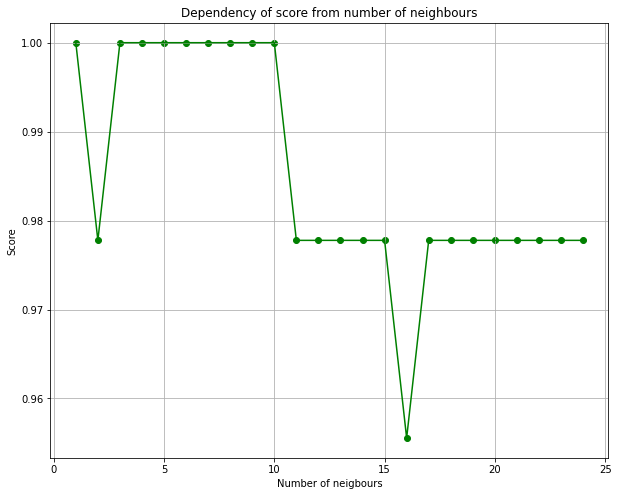

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

result = {}
score = []
for k in range(1, 25):
    temp = []
    for el in X_test:
        t = k_nearest_neigbours(X_train, el, y_train, k)
        temp.append(t)
    score.append(accuracy_score(y_test, temp))
    result[k] = temp


plt.figure(figsize=(10,8))
plt.scatter(np.arange(1, 25, 1), score, color="g")
plt.plot(np.arange(1, 25, 1), score, color="g")
plt.grid()
plt.ylabel("Score")
plt.xlabel("Number of neigbours")
plt.title("Dependency of score from number of neighbours")
plt.show()


Ex. 2.


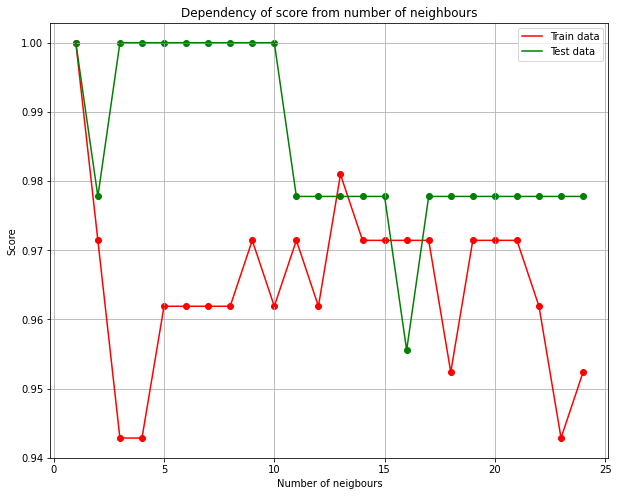

In [3]:
score_test = []
score_train = []

plt.figure(figsize=(10,8))
for k in range(1, 25):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    predict = neigh.predict(X_train)
    score_train.append(neigh.score(X_train, y_train))
    score_test.append(neigh.score(X_test, y_test))
    plt.scatter(k, neigh.score(X_train, y_train), color="r")
    plt.scatter(k, neigh.score(X_test, y_test), color="g")
plt.plot(np.arange(1, 25, 1), score_train, color="r")
plt.plot(np.arange(1, 25, 1), score_test, color="g")
plt.grid()
plt.ylabel("Score")
plt.xlabel("Number of neigbours")
plt.title("Dependency of score from number of neighbours")
plt.legend(['Train data', 'Test data'])
plt.show()

Exercise

In [4]:
from sklearn import tree
from six import StringIO  
import pydot
from sklearn.datasets import load_iris

iris = load_iris()
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)

In [5]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.png")

True

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from scipy.io import loadmat

data = loadmat('mnist.mat')
X_train = data['trainX']
X_test = data['testX']
y_train = data['trainY'].T
y_test = data['testY'].T

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
    
y[np.where(y==10)]=0

h = 28
w = 28

In [7]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Ex. 3.

c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


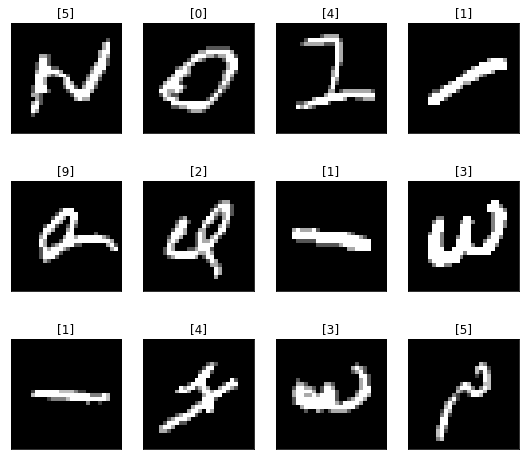

In [8]:
plot_mnist(X, y, h, w)

Ex. 4.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Ex. 5.

In [10]:
clf = tree.DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
pred = clf.predict(X_test)

Ex. 6.

In [11]:
score = f1_score(y_test, pred, average=None)
print("Score: \n", score)

Score: 
 [0.90024331 0.93849658 0.80172806 0.78550725 0.81441792 0.75622913
 0.87793783 0.8739536  0.78711552 0.76250881]


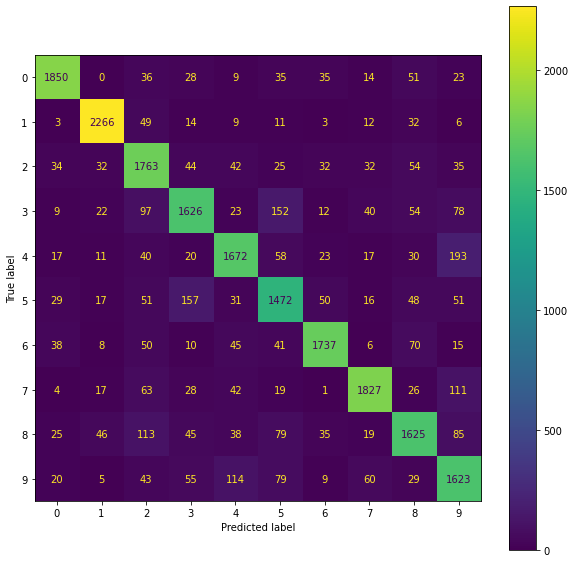

In [12]:
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

In [13]:
class_rep = classification_report(y_test, pred)
print("Classification report: \n", class_rep)

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2081
           1       0.93      0.94      0.94      2405
           2       0.76      0.84      0.80      2093
           3       0.80      0.77      0.79      2113
           4       0.83      0.80      0.81      2081
           5       0.75      0.77      0.76      1922
           6       0.90      0.86      0.88      2020
           7       0.89      0.85      0.87      2138
           8       0.80      0.77      0.79      2110
           9       0.73      0.80      0.76      2037

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000

